### 1.加载包和数据集

In [1]:

import tensorflow as tf  #  1.11.0 版本
import numpy as np
import pandas as pd
import math
import copy
from sklearn.metrics import accuracy_score,confusion_matrix
from src.utils.dnn_framework import DNN
from src.utils.cnn_framework import CNN
from  src.utils.parse_mnist import  parse_mnist_data


C:\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### 2.加载数据和数据处理

In [2]:

train_x,train_label,test_x,test_label = parse_mnist_data()

train_X = train_x/255
train_X=train_X.reshape(train_X.shape[0],28,28,1)

train_y = CNN.one_hot(Y = np.squeeze(train_label),depth=10,axis=1)

test_X = test_x/255
test_X=test_X.reshape(test_X.shape[0],28,28,1)
test_y = CNN.one_hot(Y = np.squeeze(test_label),depth=10,axis=1)

print('训练集X:',str(train_X.shape))
print('训练集Y:',str(train_y.shape))
print('测试集X:',str(test_X.shape))
print('测试集Y:',str(test_y.shape))


训练集:魔数：2051   图像数量:60000   图像宽：28   图像长:28
训练集:魔数：2049   标签数量:60000
测试集:魔数：2051   图像数量:10000   图像宽：28   图像长:28
测试集:魔数: 2049   标签数量:10000
训练集X: (60000, 28, 28, 1)
训练集Y: (60000, 10)
测试集X: (10000, 28, 28, 1)
测试集Y: (10000, 10)


### 3.DNN网络建模

In [19]:

layers=[{'type':'conv','filter':[5,5,32],'stride':[1,1],'padding':'SAME','active_function':'relu'},
        {'type':'pool','filter':[3,3],'stride':[1,1],'padding':'VALID','pooltype':'max'},
        {'type':'conv','filter':[5,5,64],'stride':[1,1],'padding':'SAME','active_function':'relu'},
        {'type':'pool','filter':[5,5],'stride':[1,1],'padding':'VALID','pooltype':'max'},
        {'type':'fc','nums':100,'active_function':'relu'},
        {'type':'fc','nums':10,'active_function':'softmax'}]

CNN_model=CNN(iters=10,
              layers=layers,
              batch_size=128,
              regularizer_type='l2',
              regularizer_rate=0.002,
              learning_rate=0.001,
              optimizer='adam'
             )

CNN_model

CNN(iters = 10,tol = 0.001,batch_size = 128,task_type = multi,learning_rate = 0.001,learning_decay = False,learning_decay_rate = 0.9,regularizer_type = l2,regularizer_rate = 0.002,optimizer = adam,momentum = 0.9,beta1 = 0.9,beta2 = 0.999,layers = [{'type': 'conv', 'filter': [5, 5, 32], 'stride': [1, 1], 'padding': 'SAME', 'active_function': 'relu'}, {'type': 'pool', 'filter': [3, 3], 'stride': [1, 1], 'padding': 'VALID', 'pooltype': 'max'}, {'type': 'conv', 'filter': [5, 5, 64], 'stride': [1, 1], 'padding': 'SAME', 'active_function': 'relu'}, {'type': 'pool', 'filter': [5, 5], 'stride': [1, 1], 'padding': 'VALID', 'pooltype': 'max'}, {'type': 'fc', 'nums': 100, 'active_function': 'relu'}, {'type': 'fc', 'nums': 10, 'active_function': 'softmax'}])

#### 学习率无衰减训练10次的模型效果

In [20]:
CNN_model.set_params(iters = 10)
CNN_model.fit({'X':train_X,'Y':train_y})

train_label_pred = CNN_model.predict(X=train_X)
train_acc_value = accuracy_score(y_true = np.squeeze(train_label),y_pred = train_label_pred,normalize = True)

test_label_pred = CNN_model.predict(X=test_X)
test_acc_value = accuracy_score(y_true=np.squeeze(test_label),y_pred=test_label_pred,normalize = True)

print('训练集acc:',train_acc_value)
print('测试集acc:',test_acc_value)


epoches:1/10
60000/60000 [finished:100.0%] - loss:0.101198 - accuracy:96.875%   
epoches:2/10
60000/60000 [finished:100.0%] - loss:0.093671 - accuracy:96.875%   
epoches:3/10
60000/60000 [finished:100.0%] - loss:0.062659 - accuracy:97.917%   
epoches:4/10
60000/60000 [finished:100.0%] - loss:0.040597 - accuracy:97.917%   
epoches:5/10
60000/60000 [finished:100.0%] - loss:0.039832 - accuracy:98.958%   
epoches:6/10
60000/60000 [finished:100.0%] - loss:0.027877 - accuracy:97.917%   
epoches:7/10
60000/60000 [finished:100.0%] - loss:0.005304 - accuracy:100.0%   
epoches:8/10
60000/60000 [finished:100.0%] - loss:0.018911 - accuracy:100.0%   
epoches:9/10
60000/60000 [finished:100.0%] - loss:0.20127 - accuracy:98.958%   
epoches:10/10
60000/60000 [finished:100.0%] - loss:0.006867 - accuracy:100.0%   
60000/60000 [finished:100.0%]   
10000/10000 [finished:100.00%]   
训练集acc: 0.9875833333333334
测试集acc: 0.9873


#### 学习率衰减训练100次,记录各迭代次数的模型和模型效果

In [28]:

CNN_model.set_params(parameters = None)
learning_base = 0.001
decay_rate = 0.8
train_acc = {}
test_acc = {}
CNN_models = []
for i in range(100):
    decay_step = int(i/2)
    learning_rate = learning_base*math.pow(decay_rate,decay_step)
    CNN_model.set_params(learning_rate = learning_rate,iters = 1)
    
    print('iters:',i)
    CNN_model.fit({'X':train_X,'Y':train_y})
    
    print('compute acc')
    train_label_pred = CNN_model.predict(X=train_X)
    accuracy = accuracy_score(y_true = np.squeeze(train_label),y_pred = train_label_pred,normalize = True)
    accuracy = np.round(accuracy,4)
    train_acc[i] = accuracy
    
    test_label_pred = CNN_model.predict(X=test_X)
    accuracy = accuracy_score(y_true=np.squeeze(test_label),y_pred=test_label_pred,normalize = True)
    accuracy = np.round(accuracy,4)
    test_acc[i] = accuracy
    CNN_models.append(copy.deepcopy(CNN_model))
    

iters: 0
epoches:1/1
60000/60000 [finished:100.0%] - loss:0.018851 - accuracy:100.0%   
compute acc
60000/60000 [finished:100.0%]   
10000/10000 [finished:100.00%]   
iters: 1
epoches:1/1
60000/60000 [finished:100.0%] - loss:0.143862 - accuracy:94.792%   
compute acc
60000/60000 [finished:100.0%]   
10000/10000 [finished:100.00%]   
iters: 2
epoches:1/1
60000/60000 [finished:100.0%] - loss:0.060515 - accuracy:98.958%   
compute acc
60000/60000 [finished:100.0%]   
10000/10000 [finished:100.00%]   
iters: 3
epoches:1/1
60000/60000 [finished:100.0%] - loss:0.049619 - accuracy:97.917%   
compute acc
60000/60000 [finished:100.0%]   
10000/10000 [finished:100.00%]   
iters: 4
epoches:1/1
60000/60000 [finished:100.0%] - loss:0.011151 - accuracy:100.0%   
compute acc
60000/60000 [finished:100.0%]   
10000/10000 [finished:100.00%]   
iters: 5
epoches:1/1
60000/60000 [finished:100.0%] - loss:0.043772 - accuracy:98.958%   
compute acc
60000/60000 [finished:100.0%]   
10000/10000 [finished:100.00

60000/60000 [finished:100.0%]   
10000/10000 [finished:100.00%]   
iters: 49
epoches:1/1
60000/60000 [finished:100.0%] - loss:0.004337 - accuracy:100.0%   
compute acc
60000/60000 [finished:100.0%]   
10000/10000 [finished:100.00%]   
iters: 50
epoches:1/1
60000/60000 [finished:100.0%] - loss:0.008756 - accuracy:100.0%   
compute acc
60000/60000 [finished:100.0%]   
10000/10000 [finished:100.00%]   
iters: 51
epoches:1/1
60000/60000 [finished:100.0%] - loss:0.008555 - accuracy:100.0%   
compute acc
60000/60000 [finished:100.0%]   
10000/10000 [finished:100.00%]   
iters: 52
epoches:1/1
60000/60000 [finished:100.0%] - loss:0.003675 - accuracy:100.0%   
compute acc
60000/60000 [finished:100.0%]   
10000/10000 [finished:100.00%]   
iters: 53
epoches:1/1
60000/60000 [finished:100.0%] - loss:0.021132 - accuracy:100.0%   
compute acc
60000/60000 [finished:100.0%]   
10000/10000 [finished:100.00%]   
iters: 54
epoches:1/1
60000/60000 [finished:100.0%] - loss:0.003965 - accuracy:100.0%   
comp

60000/60000 [finished:100.0%] - loss:0.024526 - accuracy:100.0%   
compute acc
60000/60000 [finished:100.0%]   
10000/10000 [finished:100.00%]   
iters: 98
epoches:1/1
60000/60000 [finished:100.0%] - loss:0.005648 - accuracy:100.0%   
compute acc
60000/60000 [finished:100.0%]   
10000/10000 [finished:100.00%]   
iters: 99
epoches:1/1
60000/60000 [finished:100.0%] - loss:0.007916 - accuracy:100.0%   
compute acc
60000/60000 [finished:100.0%]   
10000/10000 [finished:100.00%]   


#### 保存最优模型

In [31]:

acc_lst = list(test_acc.values())
idx = acc_lst.index(max(acc_lst))

print('训练集acc:',train_acc[idx])
print('测试集acc:',test_acc[idx])

CNN.save_model(model = CNN_models[idx],filename = 'model/mnist-model-cnn.pkl')


训练集acc: 0.9973
测试集acc: 0.9947
保存成功


#### 加载模型，计算模型效果和混淆矩阵
模型加载和效果计算

In [47]:

CNN_model = CNN.load_model(filename = 'model/mnist-model-cnn.pkl')

train_label_pre = CNN_model.predict(X=train_X)
accuracy = accuracy_score(y_true = np.squeeze(train_label),y_pred=train_label_pre,normalize = True)
accuracy = np.round(accuracy,4)
print('训练集的准确度:' + str(accuracy))

test_label_pre = CNN_model.predict(X = test_X)
accuracy = accuracy_score(y_true = np.squeeze(test_label),y_pred = test_label_pre,normalize = True)
accuracy = np.round(accuracy,4)
print('测试集的准确度:' + str(accuracy))


60000/60000 [finished:100.0%]   
训练集的准确度:0.9973
10000/10000 [finished:100.00%]   
测试集的准确度:0.9947


训练集混淆矩阵

In [36]:

train_confusion_matrix = confusion_matrix(y_true = np.squeeze(train_label),y_pred = train_label_pre)
acc_rate = np.diag(train_confusion_matrix)/train_confusion_matrix.sum(axis = 1)
train_confusion_matrix = pd.DataFrame(train_confusion_matrix)
train_confusion_matrix['acc_rate'] = acc_rate
train_confusion_matrix


,0,1,2,3,4,5,6,7,8,9,acc_rate
0,5915,0,2,0,0,0,5,0,0,1,0.998649
1,0,6727,2,0,0,0,2,10,1,0,0.997775
2,0,3,5945,0,1,0,1,7,1,0,0.997818
3,0,0,1,6120,0,1,0,6,1,2,0.998206
4,0,4,0,0,5822,0,3,1,1,11,0.996577
5,0,1,0,5,0,5408,4,1,1,1,0.997602
6,2,1,1,1,3,4,5905,0,1,0,0.997803
7,0,9,3,1,2,0,0,6248,0,2,0.997287
8,2,1,2,3,0,4,2,0,5831,6,0.996582
9,3,2,0,0,12,1,0,10,3,5918,0.994789


测试集混淆矩阵

In [40]:

test_confusion_matrix = confusion_matrix(y_true = np.squeeze(test_label),y_pred = test_label_pre)
acc_rate = np.diag(test_confusion_matrix)/test_confusion_matrix.sum(axis = 1)
test_confusion_matrix = pd.DataFrame(test_confusion_matrix)
test_confusion_matrix['acc_rate'] = acc_rate
test_confusion_matrix


,0,1,2,3,4,5,6,7,8,9,acc_rate
0,978,0,0,0,0,0,1,1,0,0,0.997959
1,0,1135,0,0,0,0,0,0,0,0,1.000000
2,0,0,1028,0,0,0,0,4,0,0,0.996124
3,0,0,0,1007,0,2,0,0,1,0,0.997030
4,0,0,0,0,979,0,0,1,0,2,0.996945
5,0,0,0,3,0,888,1,0,0,0,0.995516
6,3,2,0,1,2,4,945,0,1,0,0.986430
7,0,2,1,0,0,0,0,1023,1,1,0.995136
8,2,0,2,1,0,2,0,0,965,2,0.990760
9,0,0,0,0,5,3,0,2,0,999,0.990089


In [43]:

# iters = list(train_acc.keys())
# train_acc_value = list(train_acc.values())
# test_acc_value = list(test_acc.values())

# acc_info = pd.DataFrame(data= {'iters':iters,'train_acc':train_acc_value,'test_acc':test_acc_value},
#                         columns = ['iters','train_acc','test_acc'])

# acc_info.to_csv('result/acc-model-cnn.csv',index = False)
# acc_info


#### 不同迭代次数模型效果画图并保存

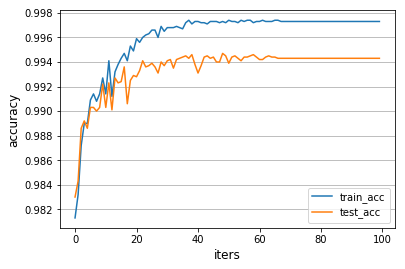

In [46]:
import matplotlib.pyplot as plt

acc_info = pd.read_csv('result/acc-model-cnn.csv')
iters = acc_info.iters
train_acc_value = acc_info.train_acc
test_acc_value = acc_info.test_acc

plt.plot(iters,train_acc_value,label = 'train_acc')
plt.plot(iters,test_acc_value,label = 'test_acc')
plt.xlabel('iters',fontsize = 'large')
plt.ylabel('accuracy',fontsize = 'large')
plt.grid(True,axis = 'y')
plt.legend()
#plt.savefig(fname = 'result/acc-model-cnn-img.jpg')
plt.show()
